# Project   :

### Business Problem : Identifying the key drivers for estimating credit card limit for the customer

### Statistical Problem :  Estimating credit card limit comes under Linear Regression problem.

In [1]:
#Importing Packages
import numpy as np
import pandas as pd
import pandas_profiling
import scipy.stats as stats
import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
#Importing data
data = pd.read_excel("Data Set.xlsx")

In [3]:


#These will help you to see all records as well as columns in the data set
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data.head(2)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.5,1.871802,34.4,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.9,2.186051,330.6,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.42866,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0


In [4]:
#Checking Missing values
sum(data.isnull().sum())

22003

In [5]:
#Checking column  and their data types
data.info() # 84 columns are catagorical as such need to convert them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [6]:
# Cat variables are region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,retire,inccat,default,
# jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,
# commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,
# telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,
# card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,
# pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,
# response_01,response_02,response_03


In [7]:
# Converting catagorical variables into a list.
cat_vars=['region','townsize','gender','agecat','birthmonth','edcat','jobcat','union','employ','empcat','retire','inccat',
          'default','jobsat','marital','spousedcat','homeown','hometype','addresscat','cars','carown','cartype',
          'carcatvalue','carbought','carbuy','commute','commutecat','commutecar','commutemotorcycle','commutecarpool',
          'commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','reason',
          'polview','polparty','polcontrib','vote','card','cardtype','cardbenefit','cardfee','cardtenure','cardtenurecat',
          'card2','card2type','card2benefit','card2fee','card2tenure','card2tenurecat','active','bfast','churn','tollfree',
          'equip','callcard','wireless','multline','voice','pager','internet','callid','callwait','forward','confer','ebill',
          'owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01','response_02',
          'response_03']


In [8]:
# Converting catagorical variables from numeric datatype
for i in cat_vars:
    data[i]=data[i].astype('object')

In [9]:
#Checking Data Dimension
data.shape

(5000, 130)

### Data Analysis :

In [10]:
#profile_report = pandas_profiling.ProfileReport(data)

#profile_report.to_file('profile_report.html')

In [11]:
#Printing all columns in data set
data.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth', 'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01', 'response_02', 'response_03'], dtype='object', length=130)

In [12]:
#Checking for missing values
data.isnull().any().value_counts() # Observing 15 columns having missing values

False    115
True      15
dtype: int64

In [13]:
#Checking the columns & respective missing values in them
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

townsize          2
lncreddebt        1
lnothdebt         1
commutetime       2
longten           3
lnlongten         3
lntollmon      2622
lntollten      2622
lnequipmon     3296
lnequipten     3296
lncardmon      1419
cardten           2
lncardten      1422
lnwiremon      3656
lnwireten      3656
dtype: int64

In [14]:
# To check for duplicate values
data.duplicated().value_counts() # no duplicate values

False    5000
dtype: int64

In [15]:
# Adding a new column total spend & dropping the summarised columns
data['Total_spend']=data.cardspent+data.card2spent
data=data.drop(columns=['cardspent','card2spent'])

In [16]:
data.head(2)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,Total_spend
0,3964-QJWTRG-NPN,1,2,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,5,1,6.5,1.871802,34.4,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46
1,0648-AIPJSP-UVM,5,5,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,39,0,8.9,2.186051,330.6,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.42866,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54


In [17]:
# Dropping column with high cardinality
del data['custid']

In [18]:
data.head(2)

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,Total_spend
0,1,2,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,5,1,6.5,1.871802,34.4,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46
1,5,5,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,39,0,8.9,2.186051,330.6,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.42866,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54


In [19]:
# Univarite Analysis:

In [20]:
# Need to understand & change.
# Insights from above plot 

# --> From Payment Status 0,1 and 3 category customers are low. Chance of selecting category 2 and 4 customers are high.
# --> Credit Amount following Exponential distribution.
# --> Age Varible is similar to exponential distribtuion. 
# --> Most of the customers have 1 or 2 accounts in this bank
# --> More than 60% customers are from category 3 Occupation.
# --> More than 90% of customers belonging to 1 in Foreign_Worker Variable. This in Insignificant variable.
#data.Guarantors.value_counts()

In [21]:
# Bivariate Analysis:

In [22]:
# Need to study & change
# Credit_Amount and Age variables have positive Correlation.
# Credit Amount and Duration in Months variables having positive Correlation.

# Based on this Scatter Plot Months_Duration variable is Most Significant compared with Age variable.

In [23]:
# Need to study & change
#Insights from above plots

#--> if the customers from Account_Balance category is 3 then their Credit Amount is Low
#--> Most of the customers belonging to 1 category in Foreign_Worker variable.
#--> Customers from four category in Purpose variable have low Credit Amount Value.

### Statistical tests

In [24]:
data.shape

(5000, 128)

In [25]:
t_test_vars=['gender',
'union',
'retire',
'default',
'marital',
'homeown',
'carbuy',
'commutecar',
'commutemotorcycle',
'commutecarpool',
'commutebus',
'commuterail',
'commutepublic',
'commutebike',
'commutewalk',
'commutenonmotor',
'telecommute',
'polparty',
'polcontrib',
'vote',
'cardfee',
'card2fee',
'active',
'churn',
'tollfree',
'equip',
'callcard',
'wireless',
'multline',
'voice',
'pager',
'callid',
'callwait',
'forward',
'confer',
'ebill',
'owntv',
'ownvcr',
'owndvd',
'owncd',
'ownpda',
'ownpc',
'ownipod',
'owngame',
'ownfax',
'news',
'response_01',
'response_02',
'response_03',
]

In [26]:

Males_spend = data.Total_spend[data.gender==0]
Females_spend = data.Total_spend[data.gender==1]

In [27]:
stats.ttest_ind(a= Males_spend,b= Females_spend,equal_var=False)

Ttest_indResult(statistic=5.3924328434764774, pvalue=7.278984464382951e-08)

### Data Preparation :

In [28]:
# Ordinal variables are 'townsize','agecat','edcat','jobcat','employ','empcat','inccat','jobsat','spousedcat','addresscat','cars'
# 'carcatvalue','commute','cardtype','cardbenefit','cardtenurecat' ,'card2type','card2benefit','card2tenurecat','cardtenure',
# card2tenure

# Nominal variables are 'region','gender','birthmonth','union','retire','default','marital','homeown','hometype','carown',
#'cartype','carbought','carbuy','commute cat',commutecar','commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic',
# 'commutebike','commutewalk','commutenonmotor','telecommute','reason','polview','polparty','polcontrib','vote','card','cardfee',
#  card2','card2fee','active','bfast','churn','tollfree','equip','callcard','wireless','multline',
# 'voice','pager','internet','callid','callwait','forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc',
# 'ownipod','owngame','ownfax','news','response_01','response_02','response_03'

# In this (address,employ,cardtenure,card2tenure) these 4 features have more than 20 catagories. As such for dummification not
# including these which are nominal in nature.




In [29]:
#Seperating numerical columns & catagorical columns
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)


['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'address', 'carvalue', 'commutetime', 'tenure', 'longmon', 'lnlongmon', 'longten', 'lnlongten', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv', 'Total_spend']
['region', 'townsize', 'gender', 'agecat', 'birthmonth', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'inccat', 'default', 'jobsat', 'marital', 'spousedcat', 'homeown', 'hometype', 'addresscat', 'cars', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'tele

In [30]:
data_num = data[numeric_var_names]
data_cat = data[cat_var_names]

#### Outlier treatment

In [31]:
def outlier_miss_treat(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    x = x.fillna(x.mean())
    return x

In [32]:
data_num_new = data_num.apply(outlier_miss_treat)

In [33]:
 def miss_treat_cat(x):
    x = x.fillna(x.mode().iloc[0])
    return x

In [34]:
data_cat_new = data_cat.apply(miss_treat_cat)

In [35]:
cat_ord=['townsize','agecat','edcat','jobcat','employ','empcat','inccat','jobsat','spousedcat','addresscat','cars','carcatvalue',
         'commute','cardtenure','card2tenure','cardtype','cardbenefit','cardtenurecat','card2type','card2benefit','card2tenurecat']


In [36]:
data_cat_ord=data_cat_new[cat_ord]

In [37]:
for i in cat_ord:
    data_cat_ord[i]=data_cat_ord[i].astype('object')

In [38]:
cat_nom=['region',
'gender',
'birthmonth',
'union',
'retire',
'default',
'marital',
'homeown',
'hometype',
'carown',
'cartype',
'carbought',
'carbuy',
'commutecar',
'commutemotorcycle',
'commutecarpool',
'commutebus',
'commutecat',
'commuterail',
'commutepublic',
'commutebike',
'commutewalk',
'commutenonmotor',
'telecommute',
'reason',
'polview',
'polparty',
'polcontrib',
'vote',
'card',
'cardfee',
'card2',
'card2fee',
'active',
'bfast',
'churn',
'tollfree',
'equip',
'callcard',
'wireless',
'multline',
'voice',
'pager',
'internet',
'callid',
'callwait',
'forward',
'confer',
'ebill',
'owntv',
'ownvcr',
'owndvd',
'owncd',
'ownpda',
'ownpc',
'ownipod',
'owngame',
'ownfax',
'news',
'response_01',
'response_02',
'response_03',
]

In [39]:
data_cat_nom=data_cat_new[cat_nom]

In [40]:
for i in cat_nom:
    data_cat_nom[i]=data_cat_nom[i].astype('object')

In [41]:
data_cat_new2 = pd.get_dummies(data_cat_nom, drop_first=True)

In [42]:
data_final = pd.concat([data_num_new, data_cat_new2,data_cat_ord], axis=1)

In [43]:
data_final.shape


(5000, 167)

In [44]:
null_columns=data_final.columns[data_final.isnull().any()]
data_final[null_columns].isnull().sum()

Series([], dtype: float64)

In [45]:
data_final.isnull().sum()

age                     0
ed                      0
income                  0
lninc                   0
debtinc                 0
creddebt                0
lncreddebt              0
othdebt                 0
lnothdebt               0
spoused                 0
reside                  0
pets                    0
pets_cats               0
pets_dogs               0
pets_birds              0
pets_reptiles           0
pets_small              0
pets_saltfish           0
pets_freshfish          0
address                 0
carvalue                0
commutetime             0
tenure                  0
longmon                 0
lnlongmon               0
longten                 0
lnlongten               0
tollmon                 0
lntollmon               0
tollten                 0
lntollten               0
equipmon                0
lnequipmon              0
equipten                0
lnequipten              0
cardmon                 0
lncardmon               0
cardten                 0
lncardten   

# Linear Regression

#### Checking for 1st assumption Y is normal / not

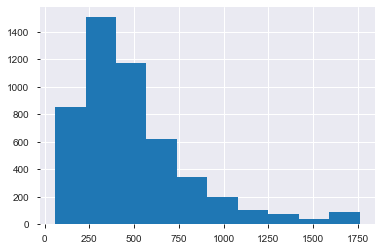

In [45]:
#Checking the Distribution of Credit_Amount
# Target variable following Exponential distribution.
data_final.Total_spend.hist()

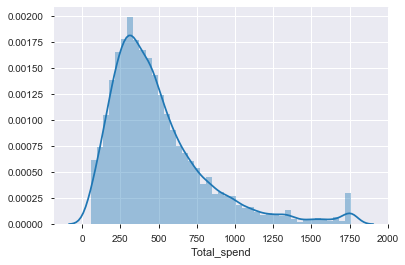

In [46]:
#
sns.distplot(data_final.Total_spend)

In [47]:
# Since the Y is skewed we shall go for log transformation
data_final['ln_Y'] = np.log(data_final.Total_spend)

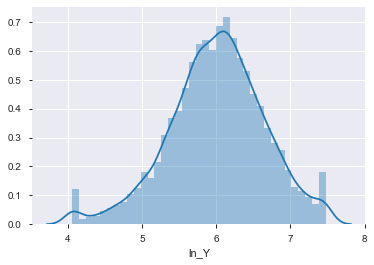

In [48]:
#Plotting transformed dependent variable
sns.distplot(data_final.ln_Y) # The distribution looks kkk

In [49]:
data_final.head(2)

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,address,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,Total_spend,region_2,region_3,region_4,region_5,gender_1,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,union_1,retire_1,default_1,marital_1,homeown_1,hometype_2,hometype_3,hometype_4,carown_0,carown_1,cartype_0,cartype_1,carbought_0,carbought_1,carbuy_1,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardfee_1,card2_2,card2_3,card2_4,card2_5,card2fee_1,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,townsize,agecat,edcat,jobcat,employ,empcat,inccat,jobsat,spousedcat,addresscat,cars,carcatvalue,commute,cardtenure,card2tenure,cardtype,cardbenefit,cardtenurecat,card2type,card2benefit,card2tenurecat,ln_Y
0,20,15,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,0,14.3,22.0,5,6.5,1.871802,34.4,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.1,4.837075,14.25,2.656757,60.0,4.094345,0.00,3.604226,0.00,6.808151,13,149.46,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,2,2,3,1,0,1,2,1,-1,1,2,1,8,2,3,1,1,2,3,1,2,5.007029
1,22,17,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,2,6.8,29.0,39,8.9,2.186051,330.6,5.800909,0.0,3.242727,0.00,6.585937,54.85,4.004602,1975.0,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,5,2,4,2,0,1,1,1,-1,1,2,1,1,4,4,4,1,2,1,3,2,4.350794


In [50]:
# Checking Co-relation of x-variables
#corrm=data_num_new.corr()
#corrm.to_csv('corrm.csv')

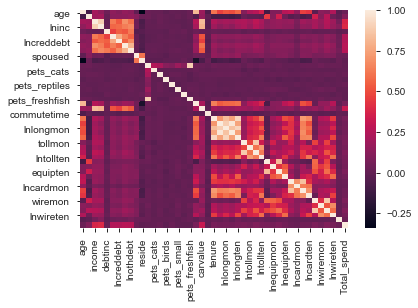

In [51]:
sns.heatmap(data_num_new.corr())

In [52]:
# From above its noted that there is very low co-relation between Y & X variables

In [53]:
# To check co-relation of Y & X through dataframe & selecting the top 10
column_names = pd.Series(list(data_num_new.corrwith(data_num_new.Total_spend).index),name='Column_Names')
r_values =  pd.Series(list(data_num_new.corrwith(data_num_new.Total_spend)),name='r_values')
corr = pd.concat([column_names,r_values],axis=1)
corr['r_values_abs'] = np.abs(corr.r_values)
corr = corr.sort_values(by=['r_values_abs'],ascending=False)


In [54]:
corr.head(10)

,Column_Names,r_values,r_values_abs
44,Total_spend,1.000000,1.000000
3,lninc,0.396852,0.396852
2,income,0.377200,0.377200
20,carvalue,0.319367,0.319367
7,othdebt,0.272972,0.272972
8,lnothdebt,0.266576,0.266576
5,creddebt,0.248547,0.248547
6,lncreddebt,0.247802,0.247802
1,ed,0.100943,0.100943
41,wireten,0.100014,0.100014


In [55]:
corr.Column_Names.head(8)# Selecting top  features having co-relation greater than 0.2 

44    Total_spend
3           lninc
2          income
20       carvalue
7         othdebt
8       lnothdebt
5        creddebt
6      lncreddebt
Name: Column_Names, dtype: object

In [56]:
data_final.shape

(5000, 168)

In [57]:
data_final.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,address,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,Total_spend,region_2,region_3,region_4,region_5,gender_1,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,union_1,retire_1,default_1,marital_1,homeown_1,hometype_2,hometype_3,hometype_4,carown_0,carown_1,cartype_0,cartype_1,carbought_0,carbought_1,carbuy_1,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardfee_1,card2_2,card2_3,card2_4,card2_5,card2fee_1,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,townsize,agecat,edcat,jobcat,employ,empcat,inccat,jobsat,spousedcat,addresscat,cars,carcatvalue,commute,cardtenure,card2tenure,cardtype,cardbenefit,cardtenurecat,card2type,card2benefit,card2tenurecat,ln_Y
0,20,15,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,0,14.3,22.0,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.1,4.837075,14.25,2.656757,60.0,4.094345,0.00,3.604226,0.00,6.808151,13,149.46,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,2,2,3,1,0,1,2,1,-1,1,2,1,8,2,3,1,1,2,3,1,2,5.007029
1,22,17,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,2,6.8,29.0,39,8.90,2.186051,330.60,5.800909,0.0,3.242727,0.00,6.585937,54.85,4.004602,1975.0,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,5,2,4,2,0,1,1,1,-1,1,2,1,1,4,4,4,1,2,1,3,2,4.350794
2,67,14,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,30,18.8,24.0,65,28.40,3.346389,1858.35,7.527444,0.0,3.242727,0.00,6.585937,0.00,3.599725,0.0,6.747846,23.00,3.135494,1410.0,7.251345,0.00,3.604226,0.00,6.808151,21,359.97,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,4,6,2,2,16,5,2,4,2,5,3,1,4,35,25,1,4,5,1,3,5,5.886021
3,23,16,20.0,2.995732,5.7,0.033160,-3.401690,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,3,8.7,38.0,36,6.00,1.791759,199.45,5.295564,0.0,3.242727,0.00,6.585937,0.00,3.599725,0.0,6.747846,21.00,3.044522,685.0,6.529419,0.00,3.604226,0.00,6.808151,26,359.41,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,3,2,3,2,0,1,1,2,4,2,3,1,1,5,5,1,4,2,2,4,2,5.884464
4,26,16,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,3,10.6,32.0,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,0.00,3.599725,0.0,6.747846,17.25,2.847812,360.0,5.886104,19.

In [58]:
##############################################################################################################################

In [59]:
# To check multicollinearity

In [60]:
# from heat map there is not much high multicollinearity

In [61]:
data_final.head(2)

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,address,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,Total_spend,region_2,region_3,region_4,region_5,gender_1,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,union_1,retire_1,default_1,marital_1,homeown_1,hometype_2,hometype_3,hometype_4,carown_0,carown_1,cartype_0,cartype_1,carbought_0,carbought_1,carbuy_1,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardfee_1,card2_2,card2_3,card2_4,card2_5,card2fee_1,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,townsize,agecat,edcat,jobcat,employ,empcat,inccat,jobsat,spousedcat,addresscat,cars,carcatvalue,commute,cardtenure,card2tenure,cardtype,cardbenefit,cardtenurecat,card2type,card2benefit,card2tenurecat,ln_Y
0,20,15,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,0,14.3,22.0,5,6.5,1.871802,34.4,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.1,4.837075,14.25,2.656757,60.0,4.094345,0.00,3.604226,0.00,6.808151,13,149.46,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,2,2,3,1,0,1,2,1,-1,1,2,1,8,2,3,1,1,2,3,1,2,5.007029
1,22,17,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,2,6.8,29.0,39,8.9,2.186051,330.6,5.800909,0.0,3.242727,0.00,6.585937,54.85,4.004602,1975.0,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,5,2,4,2,0,1,1,1,-1,1,2,1,1,4,4,4,1,2,1,3,2,4.350794


In [62]:
# Separating features(X-variables) & Y variable into 2 separate dataframe
features = data_final[data_final.columns.difference( ['ln_Y', 'Total_spend'] )]
target = data_final['ln_Y']

In [63]:
features.isnull().any().value_counts()

False    166
dtype: int64

In [64]:
target.head()

0    5.007029
1    4.350794
2    5.886021
3    5.884464
4    6.230147
Name: ln_Y, dtype: float64

## Variable Reduction

### RFE

In [65]:
import itertools

#Checking RFE 

lm = LinearRegression()
#create the RFE model and select 10 attributes
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(features, target)
select_cols = rfe.get_support()
features1=features.columns[select_cols]
pd.Series(features1)

0     card2_2
1     card2_3
2     card2_4
3     card2_5
4      card_2
5      card_3
6      card_4
7      card_5
8       lninc
9    reason_2
dtype: object

#### F - Regression

In [66]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target )

In [67]:
F_values = pd.Series(F_values)
p_values = pd.Series(p_values)
cols = pd.Series(features.columns)
f_vars = pd.concat([cols,F_values,p_values],axis=1)
f_vars.columns = ['col','f_val','p_val']
f_vars = f_vars.sort_values(by=['f_val'],ascending=False)
f_vars = f_vars.sort_values(by=['f_val'],ascending=False)
f_vars.head(10)
f_vars.col.head(10)

99           lninc
86          inccat
87          income
50        carvalue
102      lnothdebt
112        othdebt
96      lncreddebt
68        creddebt
24     carcatvalue
151       retire_1
Name: col, dtype: object

### Select K-Best

In [68]:
selector = SelectKBest(f_classif, k=10)
selector.fit(features, target)
selector.get_support()
K_Best = features.columns[selector.get_support()]
pd.Series(K_Best)

0    birthmonth_May
1           card2_5
2            card_5
3      commutecat_2
4         default_1
5         lncardten
6         lntollten
7     pets_saltfish
8          reason_2
9     response_03_1
dtype: object

### VIF

In [69]:
features2 = features.astype('float64')

In [70]:
features2.dtypes.isnull().sum()

0

In [71]:
VIF = [variance_inflation_factor(features2.values,i) for i in range(features2.shape[1])]
VIF_results = pd.concat([pd.Series(features2.columns), pd.Series(VIF)],axis=1)
VIF_results.columns = ['Feature','VIF']
VIF_results = VIF_results.sort_values('VIF',ascending=False)
VIF_results2 = VIF_results.sort_values('VIF',ascending=True)
VIF_results2.Feature.head(10)

148          response_01_1
140               reason_3
61     commutemotorcycle_1
150          response_03_1
84              hometype_4
63         commutepublic_1
149          response_02_1
62       commutenonmotor_1
160                union_1
53           commutebike_1
Name: Feature, dtype: object

In [72]:
Selected_vars={
'lninc',
'income',
'carvalue',
'othdebt',
'lnothdebt',
'creddebt',
'lncreddebt',
'card2_2',
'card2_3',
'card2_4',
'card2_5',
'card_2',
'card_3',
'card_4',
'card_5',
'lninc',
'reason_2',
'lninc',
'inccat',
'income',
'carvalue',
'lnothdebt',
'othdebt',
'lncreddebt',
'creddebt',
'carcatvalue',
'retire_1',
'birthmonth_May',
'card2_5',
'card_5',
'default_1',
'inccat',
'lncardten',
'lntollten',
'pets_saltfish',
'reason_2',
'response_03_1',
'response_01_1',
'reason_3',
'commutemotorcycle_1',
'response_03_1',
'hometype_4',
'commutepublic_1',
'response_02_1',
'commutenonmotor_1',
'union_1',
'commutebike_1',
}

In [73]:
Selected_vars = list(Selected_vars)
len(Selected_vars)

34

In [74]:
#### Data Preparation IV (Resampling data)
#### Preparing final data
All_Vars = Selected_vars + ['ln_Y']
final_data = data_final.loc[:,All_Vars]


In [75]:
final_data.shape

(5000, 35)

#### Train and Test data

In [76]:
#Splitting data into training and testing data sets
train_reg, test_reg = train_test_split(final_data, test_size = 0.3,random_state = 1234 )


In [77]:
Selected_vars

['commutenonmotor_1',
 'lninc',
 'card_2',
 'inccat',
 'card_3',
 'card_5',
 'carvalue',
 'card2_5',
 'card2_2',
 'commutebike_1',
 'response_01_1',
 'lnothdebt',
 'card_4',
 'lntollten',
 'commutemotorcycle_1',
 'default_1',
 'othdebt',
 'income',
 'retire_1',
 'reason_2',
 'carcatvalue',
 'union_1',
 'pets_saltfish',
 'reason_3',
 'birthmonth_May',
 'response_02_1',
 'card2_3',
 'commutepublic_1',
 'lncreddebt',
 'response_03_1',
 'hometype_4',
 'lncardten',
 'card2_4',
 'creddebt']

### Modeling 

In [88]:
#Formula =union_1+commutebike_1+commutemotorcycle_1+card2_2+carvalue+commutepublic_1+card2_3+income+retire_1+reason_2+pets_saltfish+
# reason_3+lnothdebt+carcatvalue+othdebt+default_1+card_2+card_4+lncardten+lncreddebt+birthmonth_May+response_02_1+
# response_01_1+card2_5+response_03_1+inccat+card_5+lninc+card_3+lntollten+commutenonmotor_1+card2_4+hometype_4+creddebt]
# After Checking Co-relation 
#Formula1=union_1+commutebike_1+commutemotorcycle_1+card2_2+commutepublic_1+card2_3+income+retire_1+reason_2+pets_saltfish+
# reason_3+carcatvalue+default_1+card_2+card_4+birthmonth_May+response_02_1+response_01_1+card2_5+response_03_1+inccat+card_5+
# card_3+commutenonmotor_1+card2_4+hometype_4
# After p-value
# Formula2= card2_2+card2_3+reason_2+lninc+card_2+card_4+card2_5+card_5+card_3+card2_4

In [79]:
my_formula='ln_Y~union_1+commutebike_1+commutemotorcycle_1+card2_2+carvalue+commutepublic_1+card2_3+income+retire_1+reason_2+pets_saltfish+reason_3+lnothdebt+carcatvalue+othdebt+default_1+card_2+card_4+lncardten+lncreddebt+birthmonth_May+response_02_1+response_01_1+card2_5+response_03_1+inccat+card_5+lninc+card_3+lntollten+commutenonmotor_1+card2_4+hometype_4+creddebt'

In [129]:
model1_train = smf.ols(my_formula, data=train_reg).fit()
print(model1_train.summary())

                            OLS Regression Results                            
Dep. Variable:                   ln_Y   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     47.40
Date:                Mon, 16 Dec 2019   Prob (F-statistic):          2.57e-287
Time:                        14:36:00   Log-Likelihood:                -2708.9
No. Observations:                3500   AIC:                             5498.
Df Residuals:                    3460   BIC:                             5744.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.1502    

In [130]:
model1_test = smf.ols(my_formula, data=test_reg).fit()
print(model1_test.summary())

                            OLS Regression Results                            
Dep. Variable:                   ln_Y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     19.31
Date:                Mon, 16 Dec 2019   Prob (F-statistic):          1.28e-104
Time:                        14:37:16   Log-Likelihood:                -1130.6
No. Observations:                1500   AIC:                             2341.
Df Residuals:                    1460   BIC:                             2554.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6320    

In [125]:
Formula1='ln_Y~union_1+commutebike_1+commutemotorcycle_1+card2_2+commutepublic_1+card2_3+income+retire_1+reason_2+pets_saltfish+reason_3+carcatvalue+default_1+card_2+card_4+birthmonth_May+response_02_1+response_01_1+card2_5+response_03_1+inccat+card_5+card_3+commutenonmotor_1+card2_4+hometype_4'


In [131]:
train_cor=train_reg
test_cor=test_reg

In [136]:
model2_train = smf.ols(Formula1, data=train_cor).fit()
print(model2_train.summary())

                            OLS Regression Results                            
Dep. Variable:                   ln_Y   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     57.08
Date:                Mon, 16 Dec 2019   Prob (F-statistic):          1.59e-282
Time:                        15:15:31   Log-Likelihood:                -2736.6
No. Observations:                3500   AIC:                             5537.
Df Residuals:                    3468   BIC:                             5734.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5282    

In [137]:
model2_test = smf.ols(Formula1, data=test_cor).fit()
print(model2_test.summary())

                            OLS Regression Results                            
Dep. Variable:                   ln_Y   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     23.12
Date:                Mon, 16 Dec 2019   Prob (F-statistic):          2.26e-104
Time:                        15:15:44   Log-Likelihood:                -1144.4
No. Observations:                1500   AIC:                             2353.
Df Residuals:                    1468   BIC:                             2523.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5898    

In [134]:
Formula2= 'ln_Y~card2_2+card2_3+reason_2+lninc+card_2+card_4+card2_5+card_5+card_3+card2_4'

In [135]:
train_p,test_p=train_reg,test_reg

In [138]:
model3_train = smf.ols(Formula2, data=train_p).fit()
print(model3_train.summary())

                            OLS Regression Results                            
Dep. Variable:                   ln_Y   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     181.3
Date:                Mon, 16 Dec 2019   Prob (F-statistic):          5.05e-308
Time:                        15:17:21   Log-Likelihood:                -2725.7
No. Observations:                3500   AIC:                             5473.
Df Residuals:                    3489   BIC:                             5541.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5506      0.058     95.036      0.0

In [139]:
model3_test = smf.ols(Formula2, data=test_p).fit()
print(model3_test.summary())

                            OLS Regression Results                            
Dep. Variable:                   ln_Y   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     72.20
Date:                Mon, 16 Dec 2019   Prob (F-statistic):          2.19e-120
Time:                        15:17:46   Log-Likelihood:                -1146.1
No. Observations:                1500   AIC:                             2314.
Df Residuals:                    1489   BIC:                             2373.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6731      0.089     63.789      0.0

In [81]:
#Transforming log values into actual values in both training and testing data sets
train_reg['pred'] = pd.DataFrame(np.exp(model.predict(train_reg)))

test_reg['pred'] = pd.DataFrame(np.exp(model.predict(test_reg)))

### Including the Y Value to compare

test_reg['Total_spend'] = np.exp(test_reg.ln_Y)

train_reg['Total_spend'] = np.exp(train_reg.ln_Y)

In [82]:
#Checking Metrics for both training and testing data sets

print("MAPE for Training and testing data sets:")
MAPE_train = np.mean(np.abs(train_reg.Total_spend - train_reg.pred)/train_reg.Total_spend)
print(MAPE_train)
MAPE_train = np.mean(np.abs(test_reg.Total_spend - test_reg.pred)/test_reg.Total_spend)
print(MAPE_train)
print("\nMSE for Training and testing data sets:")
#MSE for training and testing data sets                           
print(metrics.mean_squared_error(train_reg.Total_spend,train_reg.pred)) 
print(metrics.mean_squared_error(test_reg.Total_spend,test_reg.pred))
print("\nRMSE for Training and testing data sets:")
#RMSE for training and testing data sets                           
print(np.sqrt(metrics.mean_squared_error(train_reg.Total_spend,train_reg.pred)))
print(np.sqrt(metrics.mean_squared_error(test_reg.Total_spend,test_reg.pred)))

MAPE for Training and testing data sets:
0.4728025231501782
0.47277707164380417

MSE for Training and testing data sets:
73486.69163200179
67795.74868699015

RMSE for Training and testing data sets:
271.0842887959422
260.3761676632294


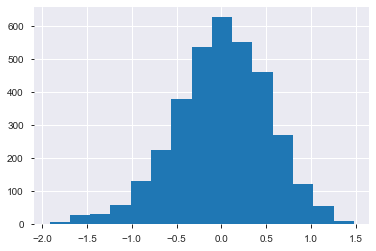

In [83]:
#Checking Errors distribution
model.resid.hist(bins=15)
model.resid.to_csv("Residual.csv")
# Residuals following Normal distribution. This is one of the Assumption in Linear Regression.

In [84]:
### Decile Analysis
#Decile analysis for validation of models - Business validation

train_reg['Deciles']=pd.qcut(train_reg['pred'],10, labels=False)
test_reg['Deciles']=pd.qcut(test_reg['pred'],10, labels=False)

In [85]:
# Decile Analysis for train data
Predicted_avg = train_reg[['Deciles','pred']].groupby(train_reg.Deciles).mean().sort_index(ascending=False)['pred']
Actual_avg = train_reg[['Deciles','Total_spend']].groupby(train_reg.Deciles).mean().sort_index(ascending=False)['Total_spend']

Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_train

,pred,Total_spend
Deciles,,
9,850.206177,930.766165
8,622.617274,699.058169
7,530.207841,600.455563
6,463.782074,530.949878
5,412.041314,491.338200
4,370.255514,406.939415
3,333.135983,370.123865
2,303.329768,346.043381
1,275.774145,325.091609


In [86]:
# Decile Analysis for train data
Predicted_avg = test_reg[['Deciles','pred']].groupby(test_reg.Deciles).mean().sort_index(ascending=False)['pred']
Actual_avg = test_reg[['Deciles','Total_spend']].groupby(test_reg.Deciles).mean().sort_index(ascending=False)['Total_spend']

Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_test


,pred,Total_spend
Deciles,,
9,816.760856,864.201963
8,610.780719,704.316749
7,524.868453,559.081765
6,459.971900,530.723216
5,412.009401,433.139600
4,373.488090,429.070816
3,335.718156,379.268133
2,306.160875,374.311235
1,280.174542,316.234667


In [87]:
#Exporting Decile analysis in csv formate
#Decile_analysis_train.to_csv('Decile_analysis_train.csv')
#Decile_analysis_test.to_csv('Decile_analysis_test.csv')

## Machine Learning 

In [95]:
data_final.shape

(5000, 168)

In [96]:
#Independent columns
Ind_col = data_final.columns.difference(['Total_spend','pred'])

In [148]:
#Considering Significant Variables for Machine Learning algorithms
train_x, test_x, train_y, test_y = train_test_split(data_final[Ind_col],data_final.Total_spend, test_size=0.3, random_state=6)

In [98]:
# Importing Required Packages
from sklearn.linear_model import Ridge,Lasso

In [99]:
# Ridge Regression

In [100]:
Ridge_Reg = Ridge(alpha=0.0001,normalize=True)
Ridge_Reg.fit(train_x,train_y)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [101]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y -Ridge_Reg.predict(train_x))/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- Ridge_Reg.predict(test_x))/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,Ridge_Reg.predict(train_x)))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,Ridge_Reg.predict(test_x)))
print(RMSE_test)

MAPE values for training and testing data :
0.3375488548417948
0.32707287261049023

RMSE values for training and testing data :
130.56954828708714
126.71705492618375


In [102]:
# Lasso Regression :

In [103]:
Lasso_Reg = Lasso(alpha=0.0001,normalize=True)
Lasso_Reg.fit(train_x,train_y)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [104]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y -Lasso_Reg.predict(train_x))/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- Lasso_Reg.predict(test_x))/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,Lasso_Reg.predict(train_x)))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,Lasso_Reg.predict(test_x)))
print(RMSE_test)

MAPE values for training and testing data :
0.3375857760509088
0.3270093579524866

RMSE values for training and testing data :
130.5711422985061
126.7014509586687


### Decision Trees :

In [105]:
#Importing packages
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [106]:
#Model building
param_grid = {'max_depth': np.arange(2, 5),
             'max_features': np.arange(4,7)}
data_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 3)
data_tree.fit(train_x,train_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([2, 3, 4]),
                         'max_features': array([4, 5, 6])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

In [107]:
#Predicting values for both training and testing data sets
tree_train_pred= data_tree.predict(train_x)
tree_test_pred=data_tree.predict(test_x)

In [108]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y -tree_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- tree_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,tree_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,tree_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.7296847069901703
0.7235617243641286

RMSE values for training and testing data :
317.3306254026819
305.7609650955022


## 2.Ensemble Learning

### 2.1 Bagging

In [109]:
#Importing required packages
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [110]:
#Model building
pargrid_ada = {'n_estimators': [50,60,70,80,100]}

gscv_bagging = GridSearchCV(estimator=BaggingRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1)

data_bagg =gscv_bagging.fit(train_x, train_y)

In [111]:
#Predicting values for both training and testing data sets
bagg_train_pred=data_bagg.predict(train_x)
bagg_test_pred=data_bagg.predict(test_x)

In [112]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - bagg_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- bagg_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,bagg_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,bagg_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.000350883299419996
0.000965908973910332

RMSE values for training and testing data :
0.5202654589009644
1.3899443211878453


### 2.2 Random Forest

In [113]:
pargrid_ada = {'n_estimators': [50,60,70,80,100],
               'max_depth':[2,3,4]}

data_rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1)
data_rf.fit(train_x,train_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
         

In [114]:
#Predicting values for both training and testing data sets
rf_train_pred=data_rf.predict(train_x)
rf_test_pred=data_rf.predict(test_x)

In [115]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - rf_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- rf_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,rf_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,rf_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.04640389448497188
0.044063030886812356

RMSE values for training and testing data :
14.492415462890833
14.287707619014574


### 2.3 Boosting

#### Ada Boost

In [116]:
pargrid_ada = {'n_estimators': [60,70,80,100],
               'learning_rate': [10 ** x for x in range(-4, 2)]}

gscv_ada = GridSearchCV(estimator=AdaBoostRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,
                        verbose=True, n_jobs=-1)

data_boost=gscv_ada.fit(train_x, train_y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  4.9min finished


In [117]:
#Predicting values for both training and testing data sets
boost_train_pred=data_boost.predict(train_x)
boost_test_pred=data_boost.predict(test_x)

In [118]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - boost_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- boost_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,boost_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,boost_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.0882977553811582
0.08066235735555297

RMSE values for training and testing data :
26.18545197016591
25.094146291540206


#### Gradient boost

In [119]:
pargrid_ada = {'n_estimators': [60,70,80,100],
               'max_depth':[2,3,4,5],
               'learning_rate': [10 ** x for x in range(-4, 2)]}

gscv_ada = GridSearchCV(estimator=GradientBoostingRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,
                        verbose=True, n_jobs=-1)

data_gbm=gscv_ada.fit(train_x, train_y)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  6.5min finished


In [120]:
#Predicting values for both training and testing data sets
gbm_train_pred=data_gbm.predict(train_x)
gbm_test_pred=data_gbm.predict(test_x)

In [121]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - gbm_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- gbm_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,gbm_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,gbm_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.001530175225231075
0.0019513525199808452

RMSE values for training and testing data :
0.6328678398196617
1.0012310726394498


#### XGBoost

In [122]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [123]:
#Importing Required packages
import xgboost
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor

In [152]:
pargrid_xg = {'n_estimators': [60,70,80,100,120],
               'max_depth':[2,3,4,5]}

gscv_xg = GridSearchCV(estimator=xgboost.XGBRegressor(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1)

data_xg=gscv_xg.fit(train_x, train_y)

ValueError: Found input variables with inconsistent numbers of samples: [3500, 1500]

In [ ]:
#Predicting values for both training and testing data sets
xg_train_pred=data_xg.predict(train_x)
xg_test_pred=data_xg.predict(test_x)

In [ ]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - xg_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- xg_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,xg_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,xg_test_pred))
print(RMSE_test)

### K - Nearest Neighbours

In [ ]:
#Importing required modules
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
#Standardising the data because KNN is distance based algorithm 
scaler = StandardScaler()
train_X = scaler.fit_transform(train_x)
test_X = scaler.fit_transform(test_x)

In [ ]:
#Model Building using different tuning parameters
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11],
                    'leaf_size':[20,30,40,50,60]}]

knn_reg = GridSearchCV(KNeighborsRegressor(),
                   tuned_parameters,
                   cv=3)

data_knn = knn_reg.fit(train_X,train_y)

In [ ]:
#Predicting values for both training and testing data sets
knn_train_pred=data_knn.predict(train_X)
knn_test_pred=data_knn.predict(test_X)

In [ ]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - knn_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- knn_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,knn_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,knn_test_pred))
print(RMSE_test)

## SVM(Support Vector Machine) 

In [ ]:
#Importing required modules
from sklearn.svm import SVR
from sklearn.svm import LinearSVR 

In [ ]:
#Model building using Linear svm 
tuned_parameters = [{'C': [1,0.1,0.001,10,100],
                    'gamma':[0.0001, 0.001, 0.01, 0.1],
                    'kernel':['linear','rbf','poly']}]

svr_reg = GridSearchCV(SVR(),
                   tuned_parameters,
                   cv=3)

data_svr = svr_reg.fit(train_X,train_y)

In [ ]:
#Predicting values for both training and testing data sets
L_svr_train_pred=data_svr.predict(train_x)
L_svr_test_pred=data_svr.predict(test_x)

In [ ]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - L_svr_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- L_svr_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,L_svr_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,L_svr_test_pred))
print(RMSE_test)

## ANN(Artificial Neural Network)

In [ ]:
#Importing required Module
from sklearn.neural_network import MLPRegressor

In [ ]:
pargrid_ann = {'activation': ['relu','tanh','logistic','identity'],
               'alpha':[0.0001,0.001,0.01,1,10,100,1000]}

ann_reg = GridSearchCV(MLPRegressor(),pargrid_ann,cv=3)

data_ann = ann_reg.fit(train_X,train_y)

In [ ]:
#Predicting values for both training and testing data sets
ann_train_pred=data_ann.predict(train_X)
ann_test_pred=data_ann.predict(test_X)

In [ ]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - ann_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- ann_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,ann_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,ann_test_pred))
print(RMSE_test)

# --------------------------------------------------------------------------------------------------------------
